**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score
import gradio as gr

**Load Dataset**

In [2]:
df = pd.read_csv("studentPerformance.csv")
print("First rows of dataset:")
print(df.head())


First rows of dataset:
   Study_Hours  Attendance  Practice_Tests  Final_Score  Pass_Fail
0     3.745401   59.256646               1    53.580408          1
1     9.507143   77.095047               2    84.990141          1
2     7.319939   93.647292               3   100.000000          1
3     5.986585   86.611244               1    76.978847          1
4     1.560186   90.328057               0    46.875418          0


**Fig : Final scores Distribution**

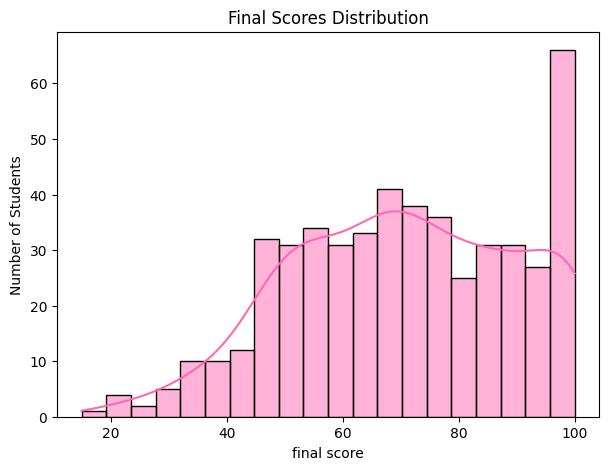

In [3]:
plt.figure(figsize=(7,5))
sns.histplot(df["Final_Score"], bins=20, kde=True, color="hotpink")
plt.title("Final Scores Distribution")
plt.xlabel("final score")
plt.ylabel("Number of Students")
plt.show()

**Data Preprocessing**

Features and Targets

In [4]:
X = df[["Study_Hours", "Attendance", "Practice_Tests"]]
y_reg = df["Final_Score"]           
y_clf = df["Pass_Fail"] 

Scaling features

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Traing and testing

In [6]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y_reg, test_size=0.3, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_scaled, y_clf, test_size=0.3, random_state=42)


**Linear Regression**

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


evaluation (linear regression)

In [8]:


y_pred_reg = lin_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

#mse2 close to mse donc modele lin_reg est bien equilibré
y_pred_reg2 =lin_reg.predict(X_train_reg)
mse2 = mean_squared_error(y_train_reg,y_pred_reg2)

print("\n📌 Linear Regression Results:")
print(f"MSE = {mse:.2f}")
print(f"R²  = {r2:.2f}")
print(f"MSE2 = {mse2:.2f}")



📌 Linear Regression Results:
MSE = 32.01
R²  = 0.91
MSE2 = 29.50


**Linear Regression Visualization**

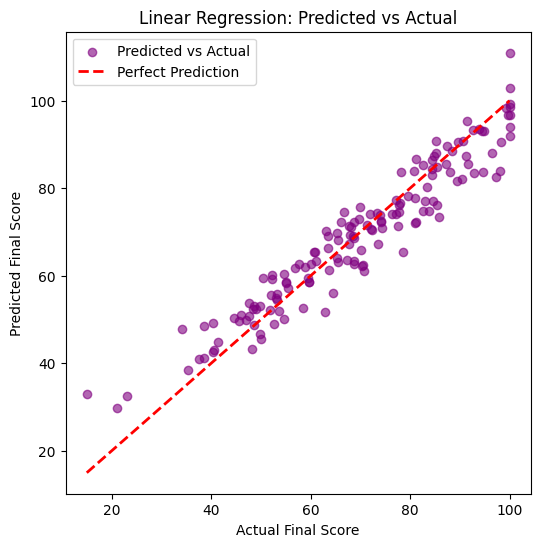

In [9]:

plt.figure(figsize=(6,6))
plt.scatter(y_test_reg, y_pred_reg, color="purple", alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test_reg.min(), y_test_reg.max()], 
         [y_test_reg.min(), y_test_reg.max()], 
         'r--', lw=2, label="Perfect Prediction")
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("Linear Regression: Predicted vs Actual")
plt.legend()
plt.show()


**Logistic Regression**

In [10]:
log_reg = LogisticRegression()
log_reg.fit(X_train_clf, y_train_clf)

y_pred_clf = log_reg.predict(X_test_clf)

evaluation (logistic regression)

In [11]:
acc = accuracy_score(y_test_clf, y_pred_clf)
prec = precision_score(y_test_clf, y_pred_clf)
rec = recall_score(y_test_clf, y_pred_clf)

print("\n📌 Logistic Regression Results:")
print(f"Accuracy  = {acc:.2f}")
print(f"Precision = {prec:.2f}")
print(f"Recall    = {rec:.2f}")



📌 Logistic Regression Results:
Accuracy  = 0.93
Precision = 0.93
Recall    = 0.98


**Logistic Regression Visualization**

<Figure size 600x600 with 0 Axes>

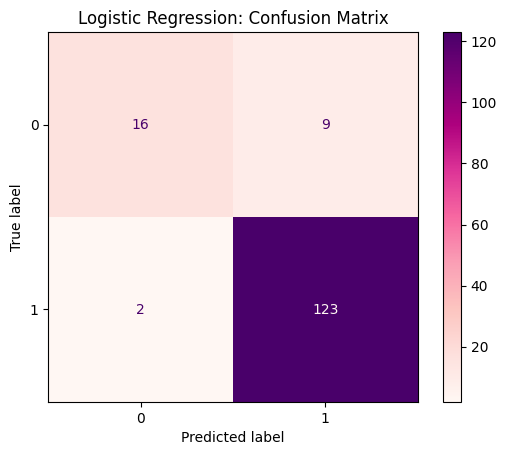

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6,6))
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_clf, y_test_clf, cmap="RdPu")
plt.title("Logistic Regression: Confusion Matrix")
plt.show()


**Gradio Interface**

Prepare Input + model prediction

In [ ]:
def predict_performance(study_hours, attendance, practice_tests):

  x = np.array([[study_hours, attendance, practice_tests]])
  x_scaled = scaler.transform(x)
  score = lin_reg.predict(X_scaled)[0]            #reg prediction
  prob = log_reg.predict_proba(X_scaled)[0][1]    #classification prediction
  pass_fail = "Pass" if prob >= 0.5 else "Fail"   
    
  return {
        "Predicted Final Score": round(score, 2),
        "Pass/Fail": pass_fail,
        "Probability of Passing": f"{prob:.2f}"
    }


Interface


In [27]:
demo = gr.Interface(
    fn=predict_performance,
    inputs=[
        gr.Number(label="Study Hours (0-10)"),
        gr.Number(label="Attendance (%)"),
        gr.Number(label="Practice Tests (0+)")
    ],
    outputs="json",
    title="🎓 Student Performance Predictor",
    description="Enter student study habits to predict final score and pass/fail probability."
)
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://420d1484202eb5af90.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
